In [1]:
import numpy as np
import statistics as stat
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sc
import statsmodels.api as sm
import math

# Генерируем выборку.

In [48]:
N = 25
selection = -np.log(1 - np.random.rand(N))
selection = sorted(selection)
print(selection, sep = '\n')

[0.0485997652455784, 0.05514940354806281, 0.07341218172889598, 0.08299348567339535, 0.11452172319098364, 0.18328695763465921, 0.24936438411723133, 0.3581543553614317, 0.3622690963062524, 0.5379497354934225, 0.6204903005458641, 0.6953974857348157, 0.7085259756792908, 0.7868567686612908, 0.8755540180895396, 0.9158456114317804, 1.057874731320868, 1.4304916896658726, 1.440354043294254, 1.444558688451618, 1.4698070014237103, 1.7985212541283575, 2.083401513888932, 2.090321563475502, 2.572662894870546]


# a) Мода, медиана, размах, оценка коэффициента асиметрии.

In [49]:
mode = stat.mode(selection)
median = stat.median(selection)
scope = max(selection) - min(selection)
estimation_of_asym_coef = sc.skew(selection)

print('Мода: ', mode)
print('Медиана: ', median)
print('Размах: ', scope)
print('Оценка коэффициента асимметрии: ', estimation_of_asym_coef)

Мода:  0.0485997652455784
Медиана:  0.7085259756792908
Размах:  2.5240631296249676
Оценка коэффициента асимметрии:  0.6755320613094766


# b) Эмпирическая функция распределения, гистограмма и boxplot.

Эмпирическая функция распределения

Text(0.5, 1.0, 'Эмпирическая функция распределения')

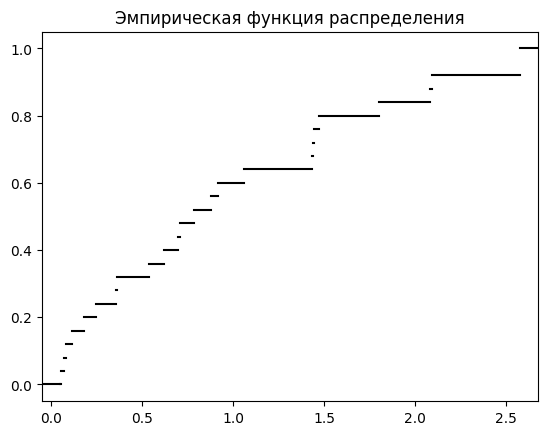

In [50]:
plt.plot([min(selection) - 0.1, min(selection)], [0, 0], color = "black")
plt.plot([max(selection), max(selection) + 0.1], [1, 1], color = "black")
for i in range(len(selection) - 1):
    plt.plot([selection[i], selection[i + 1]],[1/25 * i, 1/25 * i], color = "black")
plt.xlim(min(selection) - 0.1, max(selection) + 0.1)
plt.title('Эмпирическая функция распределения')

Гистограмма


Количество интервалов:  4
Длина столбца гистограммы:  0.8834220953687386


(array([0.63389857, 0.31694928, 0.13583541, 0.04527847]),
 array([0.02335913, 0.68592571, 1.34849228, 2.01105885, 2.67362542]),
 <BarContainer object of 4 artists>)

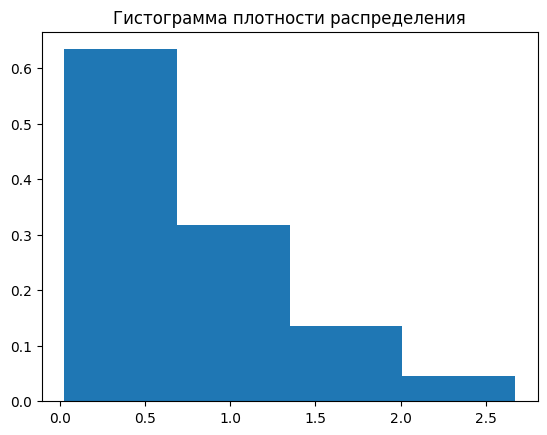

In [51]:
quantity_of_intervals = math.floor(1 + math.log(N))
delta = scope/quantity_of_intervals + scope*0.1
print('Количество интервалов: ', quantity_of_intervals)
print('Длина столбца гистограммы: ', delta)

def counting_height(start, stop, selection):
    counter = 0
    for i in range(N):
        if selection[i] >= start and selection[i] < stop:
            counter += 1
    return counter

height = []
intervals = []
plt.title('Гистограмма плотности распределения')
for i in range(quantity_of_intervals):
    height.append(counting_height(min(selection) - scope * 0.05 + i * delta, min(selection) - scope * 0.05 + (i + 1) * delta, selection) / N / delta)
    intervals.append(min(selection) - scope*0.01 + i * delta)
plt.hist(intervals, bins = int(quantity_of_intervals), weights = height)

Boxplot

[Text(0.5, 1.0, 'Boxplot')]

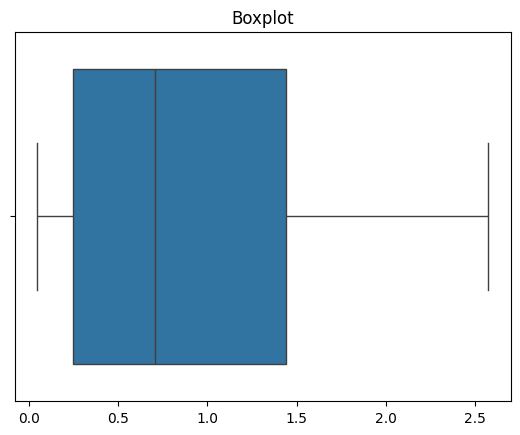

In [52]:
sns.boxplot(x = selection).set(title = "Boxplot")

# c) Плотность распределения среднего арифметического элементов выборки. Бутстраповская оценка плотности.

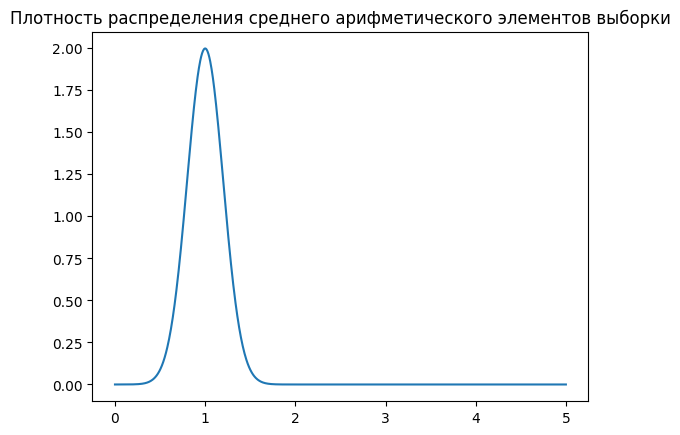

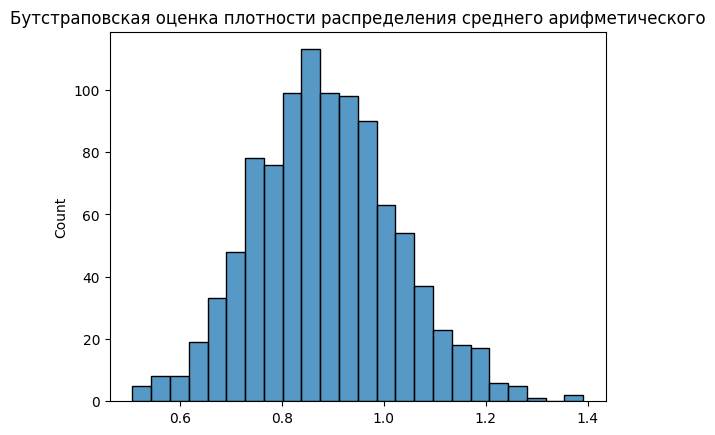

In [61]:
#генерируем плотность распределения среднего арифметического элементов выборки
x = np.linspace(0, 5, 1000)
y = N ** 0.5 / ((2 * np.pi) ** 0.5) * np.e ** (-(N / 2) * (x - 1) ** 2)
plt.title('Плотность распределения среднего арифметического элементов выборки')
plt.plot(x, y)
plt.show()

#генерируем бутстраповскую оценку плотности
def get_bootstrap(x, quantity = 1000):
    selection = np.random.choice(x, size = (N, quantity), replace = True)
    if (quantity == 1):
        selection = selection.T[0]
    return selection
x_boot = get_bootstrap(selection)
x_boot_mean = np.mean(x_boot, axis = 0)
x_boot_median = np.median(x_boot, axis = 0)
x_boot_asymmetry = sc.skew(x_boot, axis = 0)
sns_plot = sns.histplot(x_boot_mean).set(title = "Бутстраповская оценка плотности распределения среднего арифметического")

# Бутстрапоская оценка плотности распределения коэффициента асимметрии

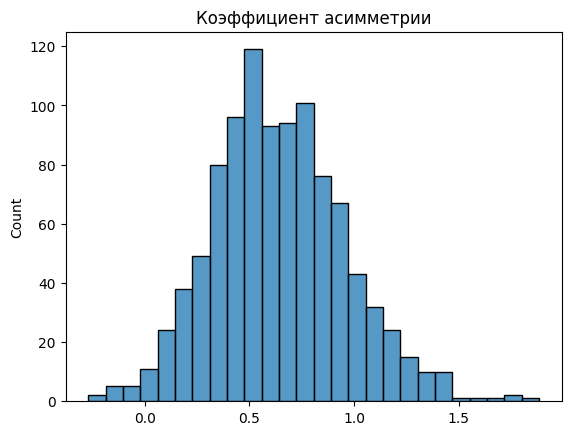

In [62]:
sns_plot = sns.histplot(x_boot_asymmetry).set(title = 'Коэффициент асимметрии')

# Плотность распределения медиан и бутстраповская оценка

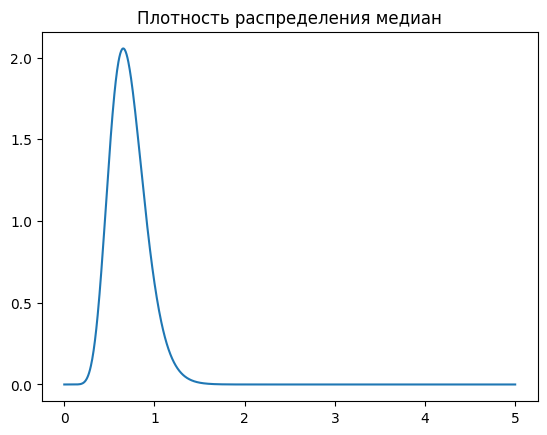

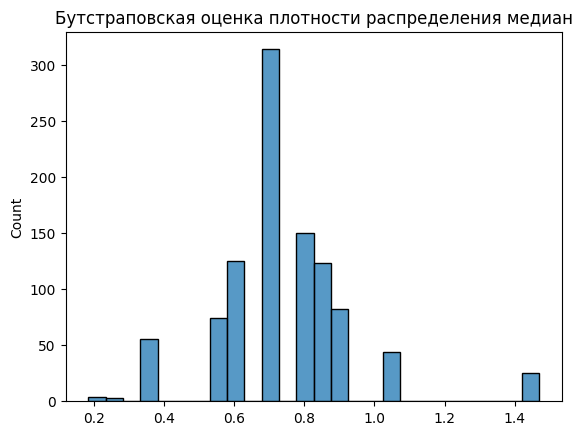

In [64]:
#генерируем плотность распределения медиан
x = np.linspace(0, 5, 1000)
median = math.comb(24, 12) * 25 * (1 - np.e ** (-x)) ** 12 * (np.e ** (-x)) ** 12 * np.e ** (-x)
plt.plot(x, median)
plt.title('Плотность распределения медиан')
plt.show()

#генерируем бутстраповскую оценку
sns_plot = sns.histplot(x_boot_median).set(title = 'Бутстраповская оценка плотности распределения медиан')